## <font style='color:blue'> Kernel Principal Component Analysis</font>

+ Molti algoritmi di **Machine Learning** fanno assunzione sulla **separabilità lineare** dei dati
+ Tuttavia, se abbiamo a che fare con problemi non lineari, che potremmo incontrare piuttosto frequentemente nelle applicazioni del mondo reale, tecniche di trasformazione lineare per la riduzione della dimensionalità (PCA e LDA) possono essere inadatte
+ Usando **KPCA**, trasformiamo i dati **non separabili linearmente** in un nuovo sottospazio di dimensione inferiore, adatto a classificatori lineari

### <font style='color:darkorange'>Caratteristiche del metodo KPCA</font>

1. Il **metodo KPCA** ci permette di trasformare i dati mappati in uno spazio **non lineare**, in uno spazio di dimensionalità **alta**, garantendo la **linearità**.
2. Vi è un passaggio da uno spazio di dimensione **d** ad uno di dimensione **k**, dove **k >> d**
3. In seguito usiamo la **PCA** per ridurre tale *alta dimensionalità* e proiettarci in uno spazio di dimensionalità **bassa**, permettendoci la **separabilità** con un **classificatore lineare** 
4. Tuttavia, tale approccio è molto **costoso** dal punto di vista computazionale, quindi usiamo il *kernel trick*
+ Usando il *kernel trick*, possiamo calcolare la somiglianza tra due vettori di *features* nello spazio delle *features* originale (con un numero molto alto di dimensionalità)

In [5]:
from IPython.display import Image
Image(
    url=
    'https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch05/images/05_11.png',
    width=500)

### <font style='color:skyblue'> Step del metodo KPCA</font>

1. Calcolo della matrice di similarità del kernel **K**
2. Centriamo la matrice **K**, usando la formula:
   <p style='text-align:center'><b>K' = K-1nK - K1n + 1nK1n</b></p> dove:<br></br>
<b>1n</b> è una matrice n x n in cui i valori sono <b>1/n</b>
3. Consideriamo i **primi k** *autovettori* della matrice del kernel centrata in base agli *autovalori* corrispondenti, che sono ordinati in modo decrescente. Contrariamente alla **PCA standard, gli autovettori non sono gli assi del componente principale, ma gli esempi già proiettati su questi assi**.

## <font style='color:darkgreen'>Kernel PCA in scikit-learn</font>

In [9]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

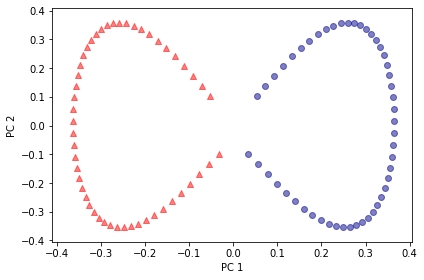

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1],
           color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1],
           color='darkblue', marker='o', alpha=0.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
plt.show()